# ThaiMNIST Example Code

### import requirement

In [38]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.contrib.learn.python.learn.datasets.mnist import extract_images, extract_labels
import numpy as np
from keras.models import load_model
import tensorflow as tf
import cv2

from matplotlib.pyplot import imshow
from PIL import Image

### Trains a simple convnet on the MNIST dataset
Gets to 99.26% test accuracy after 10 epochs
(there is still a lot of margin for parameter tuning).
20 seconds per epoch on a GTX 1060 GPU.

In [40]:
datasetpath = r'dataset\number\\' # Change to your onw dataset

with open(datasetpath + 'train-images-idx3-ubyte.gz', 'rb') as f:
    x_train = extract_images(f)
with open(datasetpath + 'train-labels-idx1-ubyte.gz', 'rb') as f:
    y_train = extract_labels(f)
with open(datasetpath + 'test-images-idx3-ubyte.gz', 'rb') as f:
    x_test = extract_images(f)
with open(datasetpath + 'test-labels-idx1-ubyte.gz', 'rb') as f:
    y_test = extract_labels(f)


batch_size = 128
num_classes = 10 # default 10 if you train alphabet class change to 26
epochs = 10 

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Extracting dataset\number\\train-images-idx3-ubyte.gz
Extracting dataset\number\\train-labels-idx1-ubyte.gz
Extracting dataset\number\\test-images-idx3-ubyte.gz
Extracting dataset\number\\test-labels-idx1-ubyte.gz
x_train shape: (284977, 28, 28, 1)
284977 train samples
31659 test samples
Train on 284977 samples, validate on 31659 samples
Epoch 1/10
284977/284977 [==============================] - 29s 102us/step - loss: 0.1764 - acc: 0.9437 - val_loss: 0.0353 - val_acc: 0.9893
Epoch 2/10
284977/284977 [==============================] - 28s 97us/step - loss: 0.0664 - acc: 0.9793 - val_loss: 0.0280 - val_acc: 0.9915 0s - loss: 0.0665
Epoch 3/10
284977/284977 [==============================] - 28s 98us/step - loss: 0.0503 - acc: 0.9841 - val_loss: 0.0231 - val_acc: 0.9925
Epoch 4/10
284977/284977 [==============================] - 28s 98us/step - loss: 0.0442 - acc: 0.9865 - val_loss: 0.0218 - val_acc: 0.9934
Epoch 5/10
284977/284977 [==============================] - 29s 103us/step - loss

### Saving Model

In [41]:
model.save("model/thaimnist.h5")

### Loading Model

In [42]:
del model
model = load_model('model/thaimnist.h5')

### Example Prediction Model

Image Shape (1, 28, 28, 1)
One-hot Prediction [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Label Prediction = 7


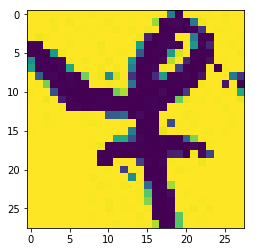

In [43]:
%matplotlib inline
img_path = r'image\number\158.png' #Change Your own  image
image = cv2.imread(img_path,0)
pil_im = Image.open(img_path, 'r')
image = image.reshape(1,28,28,1)

print('Image Shape ' + str(image.shape))
num =  model.predict(image)
print('One-hot Prediction ' + str(num[0]))
label = np.where(num[0] == 1)
imshow(np.asarray(pil_im))
print('Label Prediction = ' + str(label[0][0]))